# plot_length_scales.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 18 August 2023

Purpose: Plot length scales and associated autocorrelations

In [1]:
import sys
sys.path.append("/home/rfrost/LES-utils/")

import seaborn
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator
from LESutils import load_full
import seaborn

In [ ]:
# R2d = xr.open_dataarray("/home/rfrost/simulations/nc/full_step_9/R_2d.nc")

# Rpol = xr.open_dataarray("/home/rfrost/simulations/nc/full_step_9/R_pol_zzi10.nc")

In [2]:
sims = ["6", "9", "12", "15"]

ls_all = []
for sim in sims:
    ls = xr.open_dataset(f"/home/rfrost/simulations/nc/full_step_{sim}/576000_1152000_length_scale_rot.nc")
    ls_all.append(ls)

In [5]:
# import stats
s_all = []
for sim in sims:
    s = xr.open_dataset(f"/home/rfrost/simulations/nc/full_step_{sim}/576000_1152000_stats.nc")
    s_all.append(s)
# extract time
ntime = s_all[0].time.size

# array to hold indicies of z/zi
jz = np.zeros((len(sims),ntime))
for i, s in enumerate(s_all):
    # loop over time
    for jt in range(ntime):
        # find jz for defined z/zi
        jz[i,jt] = abs(s.z/s.zi[jt] - 0.10).argmin()

jz = jz.astype(int)

In [10]:
# plotting setup
rc('font',weight='normal',size=20,family='serif',serif='Times New Roman')
rc('text',usetex='True')
rc('figure',facecolor='white')
# cmap = seaborn.color_palette("Spectral", as_cmap=True)
colors = seaborn.color_palette("rocket_r", len(sims))

Text(0.5, 0, 'Time [hr]')

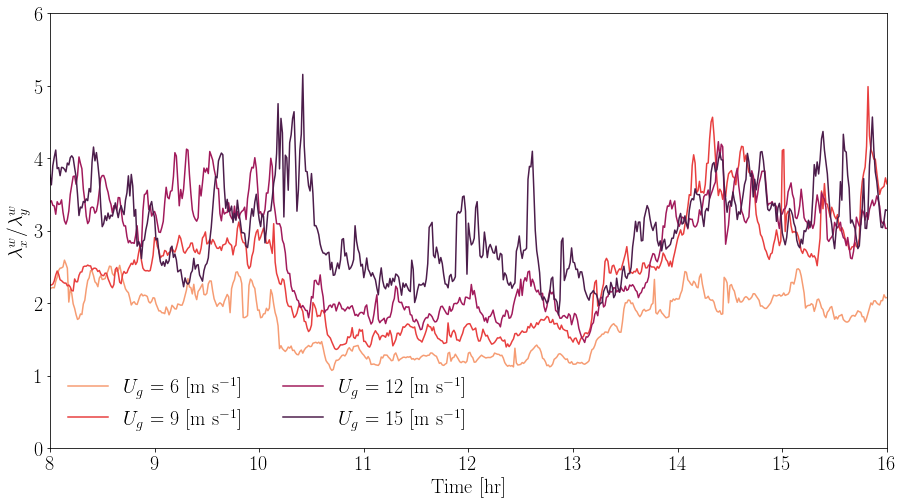

In [26]:
fig, ax = plt.subplots(figsize=(15,8))

for i, ls in enumerate(ls_all):
    ax.plot(ls.time/3600 + 8, ls.rolls[:,jz[i,jt]]/ls.normal[:,jz[i,jt]], c=colors[i], label=f"$U_g$ =  {sims[i]} [m s$^{{{-1}}}$]")

ax.legend(frameon=False, ncol=2, loc="lower left")

ax.set_ylim(0,6)
ax.set_xlim(8,16)

ax.set_ylabel("$\lambda_{x}^{w} / \lambda_{y}^{w}$")
ax.set_xlabel("Time [hr]")